HW3 Problem #6 - Exercise A15.6

In [1]:
import os
import sys

# add the directory containing the notebook to Python path
sys.path.append(os.getcwd())

import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

status: optimal
optimal sidelobe level (linear): 0.006688878564020041


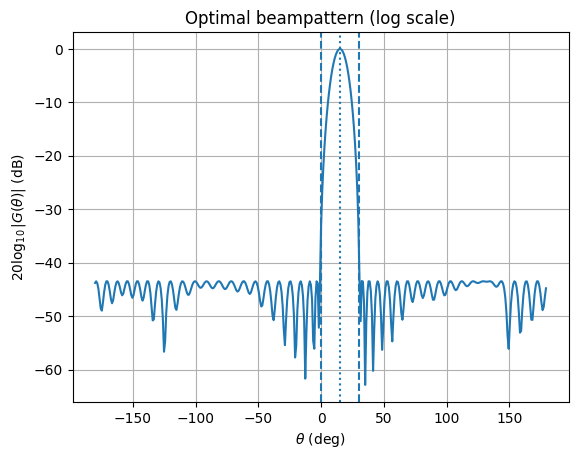

In [5]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# Instantiate random sensor locations
np.random.seed(0)
n = 40
x = 30 * np.random.rand(n)
y = 30 * np.random.rand(n)

theta_tar_deg = 15.0
Delta_deg = 15.0
N = 400

theta_tar = np.deg2rad(theta_tar_deg)
Delta = np.deg2rad(Delta_deg)
thetas = np.linspace(-np.pi, np.pi, N, endpoint=False)

# Angular distance on the circle [-pi, pi]
ang_dist = np.abs(np.angle(np.exp(1j * (thetas - theta_tar))))  # in [0, pi]
indexes = ang_dist >= Delta

# A[k, j] = exp( i*(x_j cos theta_k + y_j sin theta_k) )
A = np.exp(1j * (np.outer(np.cos(thetas), x) + np.outer(np.sin(thetas), y)))
a_tar = np.exp(1j * (x * np.cos(theta_tar) + y * np.sin(theta_tar)))  # length n
A_sl = A[indexes, :] 

w = cp.Variable(n, complex=True)
t = cp.Variable(nonneg=True)

constraints = [
    a_tar.T @ w == 1,                 
    cp.abs(A_sl @ w) <= t             
]

prob = cp.Problem(cp.Minimize(t), constraints)

try:
    prob.solve(solver=cp.ECOS)
except cp.SolverError:
    prob.solve(solver=cp.SCS, eps=1e-5, max_iters=20000)

print("status:", prob.status)
print("optimal sidelobe level (linear):", t.value)

G = A @ w.value
mag = np.abs(G)
mag_db = 20 * np.log10(np.maximum(mag, 1e-12))

plt.figure()
plt.plot(np.rad2deg(thetas), mag_db)
plt.axvline(theta_tar_deg - Delta_deg, linestyle="--")
plt.axvline(theta_tar_deg + Delta_deg, linestyle="--")
plt.axvline(theta_tar_deg, linestyle=":")
plt.xlabel(r"$\theta$ (deg)")
plt.ylabel(r"$20\log_{10}|G(\theta)|$ (dB)")
plt.title("Optimal beampattern (log scale)")
plt.grid(True)
plt.show()
